In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("D:\\Studies\\9 Semester\\Explo\\tweets\\2016-06-23.csv", sep=";",error_bad_lines=False)

b'Skipping line 1458: expected 10 fields, saw 12\nSkipping line 2248: expected 10 fields, saw 11\nSkipping line 3817: expected 10 fields, saw 11\nSkipping line 5515: expected 10 fields, saw 11\nSkipping line 7654: expected 10 fields, saw 11\nSkipping line 7742: expected 10 fields, saw 11\nSkipping line 9020: expected 10 fields, saw 11\nSkipping line 12731: expected 10 fields, saw 11\nSkipping line 13119: expected 10 fields, saw 12\nSkipping line 18077: expected 10 fields, saw 11\nSkipping line 26569: expected 10 fields, saw 11\nSkipping line 27440: expected 10 fields, saw 11\nSkipping line 27713: expected 10 fields, saw 11\nSkipping line 29036: expected 10 fields, saw 11\nSkipping line 30588: expected 10 fields, saw 11\nSkipping line 31943: expected 10 fields, saw 11\nSkipping line 32789: expected 10 fields, saw 11\nSkipping line 35031: expected 10 fields, saw 11\nSkipping line 35555: expected 10 fields, saw 11\nSkipping line 39007: expected 10 fields, saw 11\nSkipping line 47401: expe

In [15]:
import datetime
date_time_obj = datetime.datetime.strptime('2016-06-24 01:59', '%Y-%m-%d %H:%M')
date_time_obj

datetime.datetime(2016, 6, 24, 1, 59)

In [98]:
from matplotlib import pyplot as plt

In [56]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Anna
[nltk_data]     Marciniec\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [57]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [ ]:
from textblob import TextBlob 

In [143]:
def text_blob_score(sentence):
    analysis = TextBlob(clean_tweet(tweet)) 
    return analysis.sentiment.polarity

In [144]:
def clean_tweet( tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  
def get_tweet_sentiment( tweet): 
    analysis = TextBlob(clean_tweet(tweet)) 
    return analysis.sentiment.polarity

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [335]:
tweet_date =dataset[['date', 'text']].values.tolist()

In [336]:
def count_sentiment(tweets):
    positive = []
    negative = []
    neutral = []
    for tweet in tweets:
        sentiment = nltk_sentiment(tweet[1])
        if sentiment['compound'] > 0.05:
            positive.append(tweet)
        elif sentiment['compound']  < -0.05:
            negative.append(tweet)
        else:
            neutral.append(tweet)
    return positive, negative, neutral

In [337]:
counted_sentiment = count_sentiment(tweet_date)

In [338]:
positive = counted_sentiment[0]
negative = counted_sentiment[1]
neutral = counted_sentiment[2]

In [339]:
df_pos = pd.DataFrame(positive)
df_neg = pd.DataFrame(negative)
df_neu = pd.DataFrame(neutral)

In [383]:
df_all = pd.DataFrame(tweet_date)

In [354]:
df_pos.columns = df_neg.columns = df_neu.columns = df_all.columns = ['date', 'tweets']

In [378]:
def count_min_intervals(df, minutes):
    return df['date'].dt.floor(f'{minutes}T').value_counts().sort_index().reset_index()

In [381]:
df_positive = count_min_intervals(df_pos, 5)
df_negative = count_min_intervals(df_neg, 5)
df_neutral = count_min_intervals(df_neu, 5)

In [384]:
df_all = count_min_intervals(df_all, 5)

In [364]:
def plot_sentiment(df, df_positive, df_negative, df_neutral, title):
    plt.figure(figsize=(27, 9))
    plt.plot(df_positive.iloc[:,0], df_positive.iloc[:,1], color='green', label = 'positive')
    plt.plot(df_negative.iloc[:,0], df_negative.iloc[:,1], color='red', label = 'negative')
    plt.plot(df_neutral.iloc[:,0], df_neutral.iloc[:,1], color='blue', label = 'neutral')
    plt.plot(df.iloc[:,0], df.iloc[:,1], color='black', label = 'all tweets')
    plt.legend(loc="upper left")
    plt.title(title)
    plt.show()

In [369]:
len(dataset)

84174

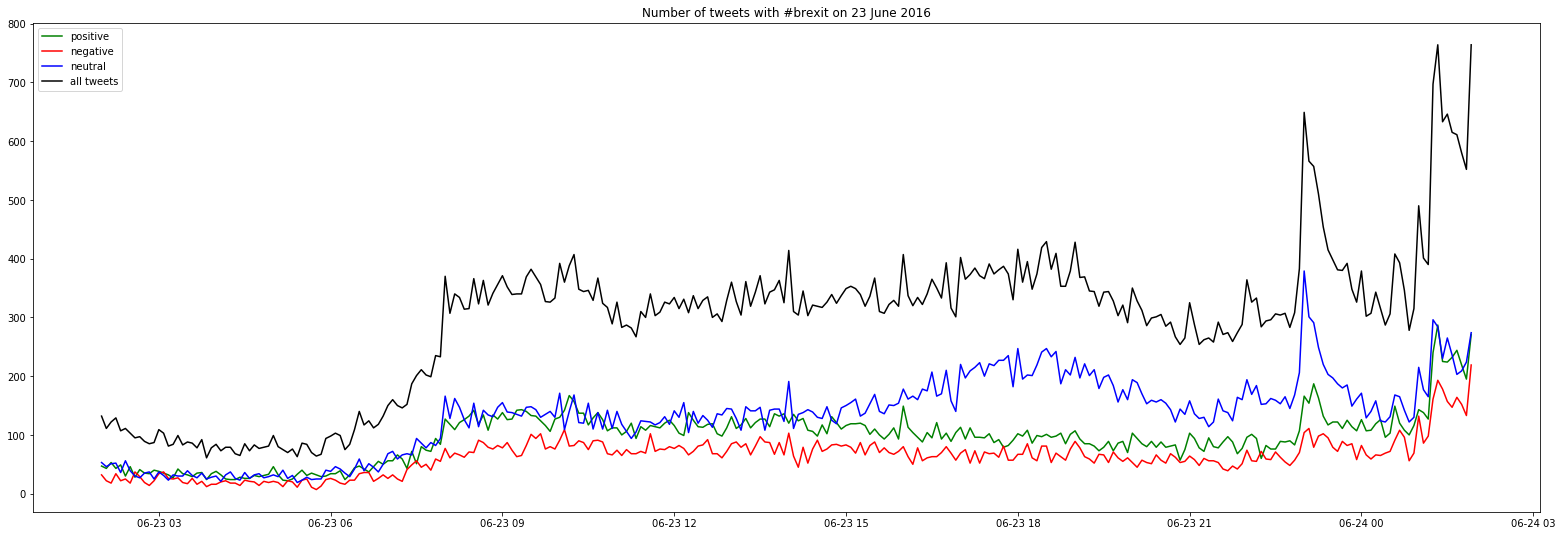

In [359]:
plot_sentiment(df_all,df_positive, df_negative, df_neutral, 'Number of tweets with #brexit on 23 June 2016' )

In [385]:
def sentiment_pipeline(dataset, title, minutes):
    tweet_date =dataset[['date', 'text']].values.tolist()
    counted_sentiment = count_sentiment(tweet_date)
    positive = counted_sentiment[0]
    negative = counted_sentiment[1]
    neutral = counted_sentiment[2]
    
    df_all = pd.DataFrame(tweet_date)
    
    df_pos = pd.DataFrame(positive)
    df_neg = pd.DataFrame(negative)
    df_neu = pd.DataFrame(neutral)
    
    df_pos.columns = df_neg.columns = df_neu.columns = df_all.columns = ['date', 'tweets']  
    
    df_positive = count_min_intervals(df_pos, minutes)
    df_negative = count_min_intervals(df_neg, minutes)
    df_neutral = count_min_intervals(df_neu, minutes)
    df_all = count_min_intervals(df_all, minutes)
    
    plot_sentiment(df_all,df_positive, df_negative, df_neutral, title )

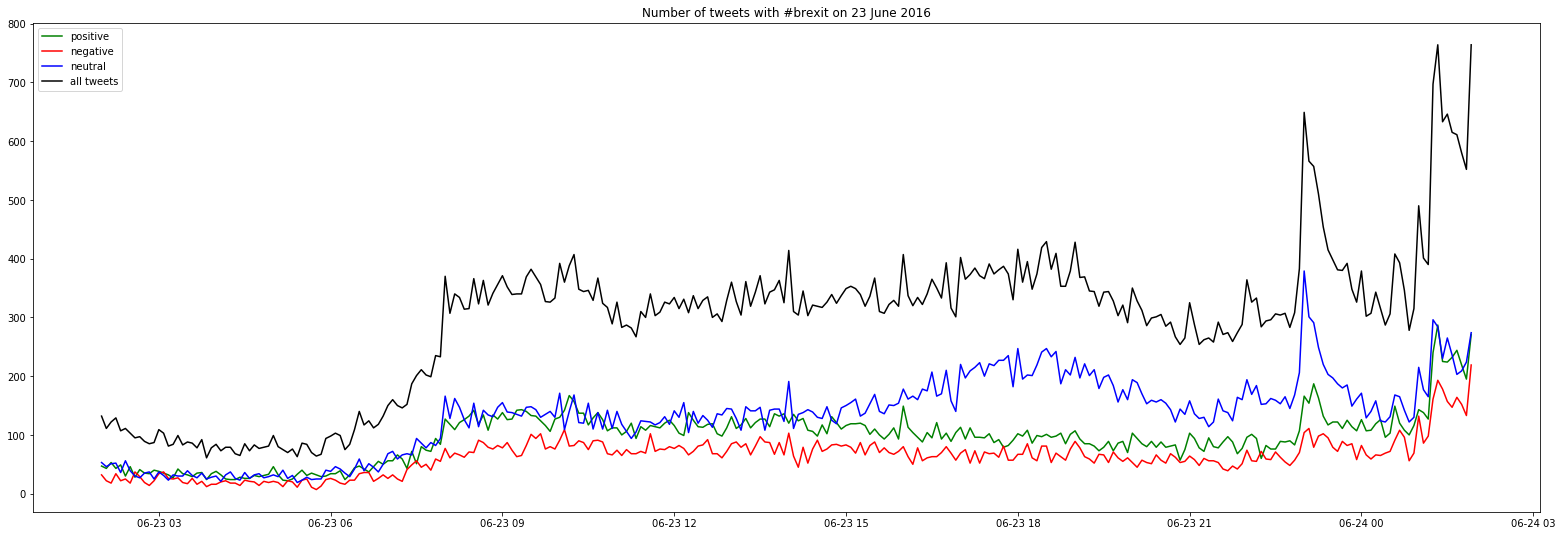

In [386]:
sentiment_pipeline(dataset, 'Number of tweets with #brexit on 23 June 2016', 5)

In [387]:
tweet_date = dataset[dataset['retweets']>0]

In [388]:
len(tweet_date)

19053

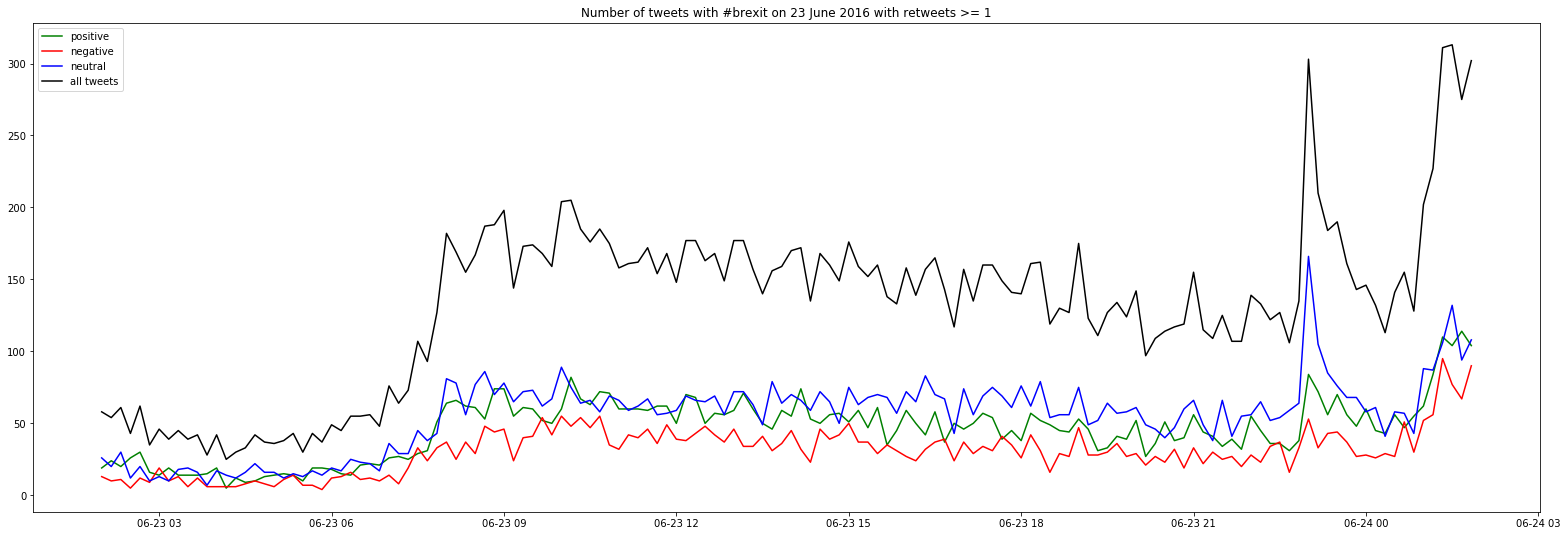

In [390]:
sentiment_pipeline(tweet_date, 'Number of tweets with #brexit on 23 June 2016 with retweets >= 1', 10)

In [391]:
tweet_date = dataset[dataset['retweets']>10]
len(tweet_date)

1638

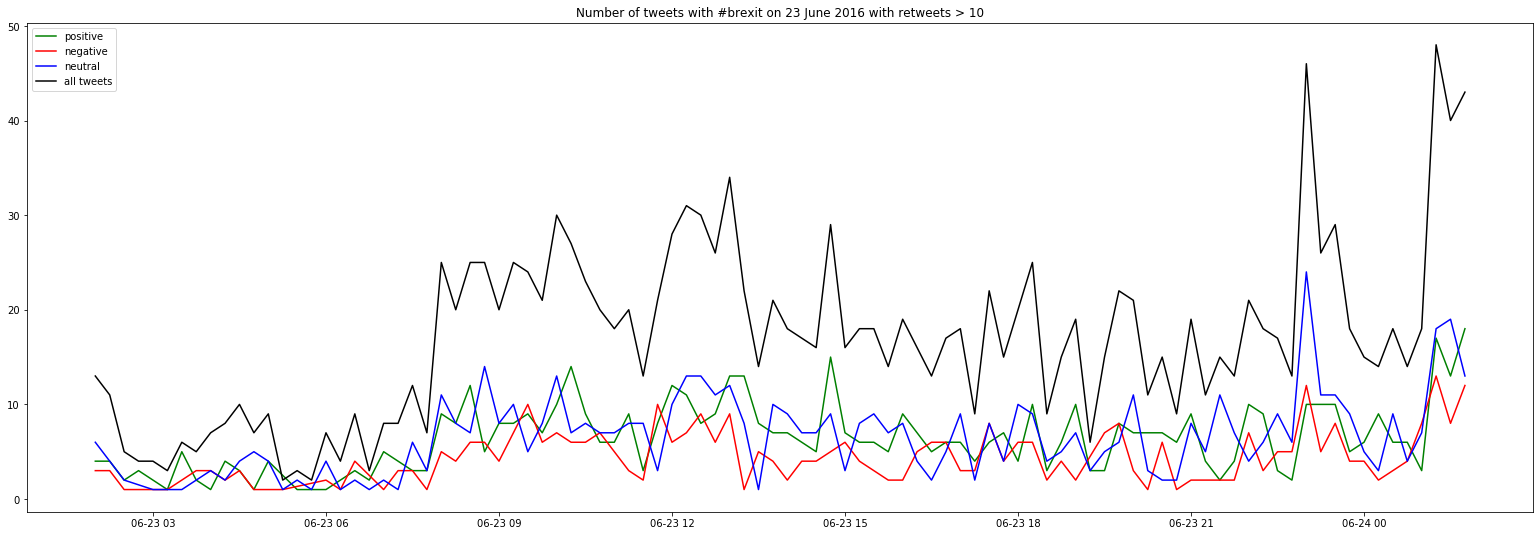

In [393]:
tweet_date = dataset[dataset['retweets']>10]
sentiment_pipeline(tweet_date, 'Number of tweets with #brexit on 23 June 2016 with retweets > 10', 15)

In [407]:
text = " ".join(clean_tweet(tweet) for tweet in dataset.text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 9575626 words in the combination of all tweets.


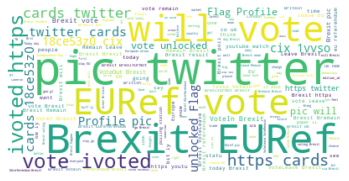

In [408]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [409]:
import spacy
import en_core_web_md

nlp = en_core_web_md.load()

In [416]:
xD =dataset.text.iloc[0]

In [424]:
nlp(xD)

#Brexit update: British pound stumbles 6% with narrow remain win in Newscastle, leave win in Sunderland http:// glbn.ca/8FJkKT

In [423]:
text

'#Brexit update: British pound stumbles 6% with narrow remain win in Newscastle, leave win in Sunderland http:// glbn.ca/8FJkKT'